In [167]:
import pandas as pd

df = pd.read_excel("./DATA/contoh_data_bermasalah.xlsx")

# df.info()

print(f"Ukuran dataset sebelum pembersihan akhir: {df.shape}")

check_dup = df.duplicated().sum()

print(f"Jumlah baris yang memiliki duplikat: {check_dup.sum()}")

# Drop duplicate
df = df.drop_duplicates()

print(f"Ukuran dataset setelah pembersihan duplikat: {df.shape}")
print(f"Jumlah missing values pada kolom Status: {df['Status'].isnull().sum()}")

# Drop status null
df = df.dropna(subset=["Status"]).copy()

print(f"Ukuran dataset setelah pembersihan missing value: {df.shape}")

# df.head()

Ukuran dataset sebelum pembersihan akhir: (160, 7)
Jumlah baris yang memiliki duplikat: 10
Ukuran dataset setelah pembersihan duplikat: (150, 7)
Jumlah missing values pada kolom Status: 15
Ukuran dataset setelah pembersihan missing value: (135, 7)


In [137]:
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)

Jumlah missing values per kolom:
ID                 0
Nama               0
Usia               0
Kota               0
Pendapatan         0
Status            16
Tanggal Daftar     0
dtype: int64


In [56]:
status_mode = df['Status'].mode()[0]

print(f"Modus dari kolom Status adalah: {status_mode}")

Modus dari kolom Status adalah: Aktif


In [57]:
df['Status'] = df['Status'].fillna(status_mode)
missing_values_after_fill = df['Status'].isnull().sum()
print(f"Jumlah missing values pada kolom Status setelah diisi: {missing_values_after_fill}")

Jumlah missing values pada kolom Status setelah diisi: 0


In [153]:
duplicate_rows_count = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows_count)

if duplicate_rows_count > 0:
    print("Menghapus baris duplikat")
    df = df.drop_duplicates()

duplicate_rows_after = df.duplicated().sum()
print("Jumlah baris duplikat setelah dihapus:", duplicate_rows_after)

df.head()

Jumlah baris duplikat: 10
Menghapus baris duplikat
Jumlah baris duplikat setelah dihapus: 0


,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar
0,118,Pengguna_118,51,Yogyakarta,9819256,Aktif,2023-06-26
1,29,Pengguna_29,37,Jakarta,4991886,Aktif,2023-07-20
2,119,Pengguna_119,31,Medan,19094979,Aktif,2023-05-17
3,44,Pengguna_44,54,Makassar,15843052,Tidak Aktif,2023-05-10
4,124,Pengguna_124,26,Bandung,86377074,Pending,2023-05-05


In [125]:
categorical_cols = df.select_dtypes(include="object").columns
print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerikal:")
print(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: Nama
Nama
Pengguna_118    1
Pengguna_29     1
Pengguna_119    1
Pengguna_44     1
Pengguna_124    1
               ..
Pengguna_8      1
Pengguna_35     1
Pengguna_13     1
Pengguna_1      1
Pengguna_69     1
Name: count, Length: 150, dtype: int64

Kolom: Kota
Kota
Surabaya      27
Palembang     20
Semarang      18
Makassar      16
Jakarta       14
Yogyakarta    13
Jakarta       13
Bandung       12
Medan          9
bandung        8
Name: count, dtype: int64

Kolom: Status
Status
Aktif          61
Tidak Aktif    54
Pending        20
Name: count, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerikal:
               ID        Usia    Pendapatan
count  150.000000  150.000000  1.500000e+02
mean    75.500000   38.280000  1.362082e+07
std     43.445368   12.720073  1.181358e+07
min      1.000000   18.000000  3.148508e+06
25%     38.250000   27.000000  7.722654e+06
50%     75.500000   37.000000  1.188468e+07
75%  

In [104]:
df["Kota"] = df["Kota"].str.lower().str.strip()

print("Distribusi kolom 'Kota':")
print(df["Kota"].value_counts())

Distribusi kolom 'Kota':
Kota
jakarta       30
surabaya      29
bandung       22
semarang      21
palembang     20
makassar      16
yogyakarta    13
medan          9
Name: count, dtype: int64


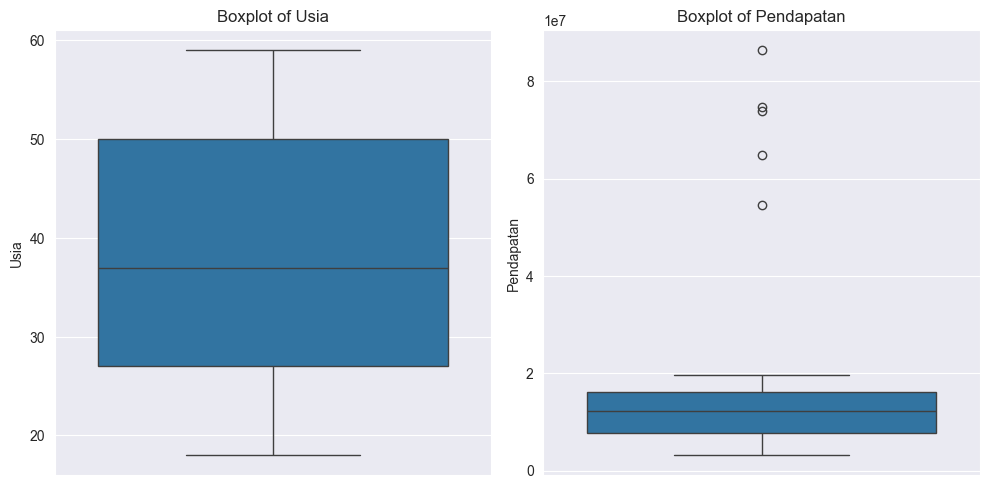

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_outliers = ["Usia", "Pendapatan"]
plt.figure(figsize=(10, 5))

for i, col in enumerate(numerical_cols_outliers):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Statistik deskriptif untuk kolom 'Pendapatan' setelah di-clip:
count    1.600000e+02
mean     1.197345e+07
std      4.876602e+06
min      3.148508e+06
25%      7.730341e+06
50%      1.233055e+07
75%      1.614232e+07
max      2.000000e+07
Name: Pendapatan, dtype: float64


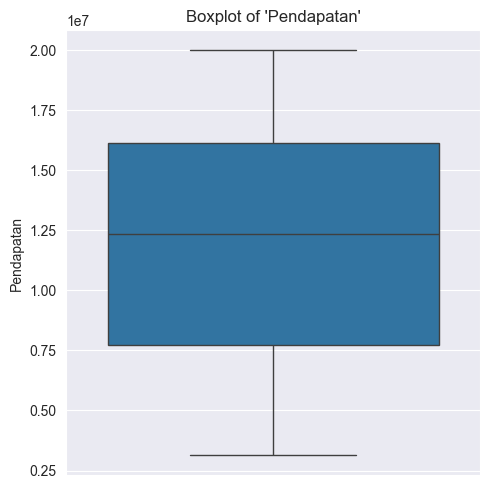

In [62]:
upper_limit = 20_000_000
df["Pendapatan"] = df["Pendapatan"].clip(
    upper=upper_limit
)

print(f"Statistik deskriptif untuk kolom 'Pendapatan' setelah di-clip:")

print(df["Pendapatan"].describe())

plt.figure(figsize=(5, 5))
sns.boxplot(data=df, y="Pendapatan")
plt.title("Boxplot of 'Pendapatan'")
plt.ylabel("Pendapatan")
plt.tight_layout()
plt.show()

In [105]:
df["Tanggal Daftar"] = pd.to_datetime(df["Tanggal Daftar"])
df["Tahun Daftar"] = df["Tanggal Daftar"].dt.year
df["Bulan Daftar"] = df["Tanggal Daftar"].dt.month
df["Hari Daftar"] = df["Tanggal Daftar"].dt.day

df.head()

,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar,Tahun Daftar,Bulan Daftar,Hari Daftar
0,118,Pengguna_118,51,yogyakarta,9819256,Aktif,2023-06-26,2023,6,26
1,29,Pengguna_29,37,jakarta,4991886,Aktif,2023-07-20,2023,7,20
2,119,Pengguna_119,31,medan,19094979,Aktif,2023-05-17,2023,5,17
3,44,Pengguna_44,54,makassar,15843052,Tidak Aktif,2023-05-10,2023,5,10
4,124,Pengguna_124,26,bandung,86377074,Pending,2023-05-05,2023,5,5


In [128]:
print(f"Ukuran dataset sebelum dihapus: {df.shape}")

missing_values_before_drop = df["Status"].isnull().sum()
print(f"Jumlah missing values pada kolom Status sebelum dihapus: {missing_values_before_drop}")

df = df.dropna(subset=["Status"]).copy()

missing_values_after_drop = df["Status"].isnull().sum()
print(f"Jumlah missing values pada kolom Status setelah dihapus: {missing_values_after_drop}")

print(f"Ukuran dataset setelah dihapus: {df.shape}")

Ukuran dataset sebelum dihapus: (135, 7)
Jumlah missing values pada kolom Status sebelum dihapus: 0
Jumlah missing values pada kolom Status setelah dihapus: 0
Ukuran dataset setelah dihapus: (135, 7)


In [120]:
upper_limit = 20_000_000

rows_before_drop = df.shape[0]
print(f"Jumlah baris sebelum dihapus: {rows_before_drop}")

df = df[df["Pendapatan"] <= upper_limit].copy()

rows_after_drop = df.shape[0]
print(f"Jumlah baris setelah dihapus: {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

print("Statistik deskriptif untuk 'Pendapatan' setelah outlier dihapus:")
print(df["Pendapatan"].describe())

df.head()

Jumlah baris sebelum dihapus: 150
Jumlah baris setelah dihapus: 145
Jumlah outlier yang dihapus: 5
Statistik deskriptif untuk 'Pendapatan' setelah outlier dihapus:
count    1.450000e+02
mean     1.164559e+07
std      4.758943e+06
min      3.148508e+06
25%      7.709702e+06
50%      1.164209e+07
75%      1.572649e+07
max      1.960468e+07
Name: Pendapatan, dtype: float64


,ID,Nama,Usia,Kota,Pendapatan,Status,Tanggal Daftar
0,118,Pengguna_118,51,Yogyakarta,9819256,Aktif,2023-06-26
1,29,Pengguna_29,37,Jakarta,4991886,Aktif,2023-07-20
2,119,Pengguna_119,31,Medan,19094979,Aktif,2023-05-17
3,44,Pengguna_44,54,Makassar,15843052,Tidak Aktif,2023-05-10
4,124,Pengguna_124,26,Bandung,86377074,Pending,2023-05-05


In [121]:
print(df.shape)

(145, 7)


In [135]:
output_file_name = "D:/KULIAH/SEMESTER 3/EXPLORATORY DATA ANALYSIS/PERTEMUAN 5/DATA/data_bersih_drop.xlsx"
df.to_excel(output_file_name, index=False)

print(f"Ukuran dataset yang sudah dibersihkan: {df.shape}")

print(f"Dataset yang sudah dibersihkan telah disimpan ke file: {output_file_name}")

Ukuran dataset yang sudah dibersihkan: (135, 7)
Dataset yang sudah dibersihkan telah disimpan ke file: D:/KULIAH/SEMESTER 3/EXPLORATORY DATA ANALYSIS/PERTEMUAN 5/DATA/data_bersih_drop.xlsx


In [155]:
print(f"Ukuran dataset sebelum pembersihan akhir: {df.shape}")

# Hapus missing values pada kolom 'Status'
df = df.dropna(subset=["Status"]).copy()

print(f"Ukuran dataset setelah pembersihan missing value: {df.shape}")

# # Hapus outlier pada kolom 'Pendapatan'
# df = df[df["Pendapatan"] <= upper_limit].copy()

# Hapus duplikat
check_dup = df.duplicated().sum()
print(f"Jumlah baris yang memiliki duplikat: {check_dup.sum()}")
df = df.drop_duplicates()

print(f"Ukuran dataset setelah pembersihan duplikat: {df.shape}")

print(f"Ukuran dataset setelah pembersihan akhir: {df.shape}")

Ukuran dataset sebelum pembersihan akhir: (160, 7)
Ukuran dataset setelah pembersihan missing value: (144, 7)
Jumlah baris yang memiliki duplikat: 9
Ukuran dataset setelah pembersihan duplikat: (135, 7)
Ukuran dataset setelah pembersihan akhir: (135, 7)
